In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline

In [15]:
demo=pd.read_excel("demographics.xlsx")
demo.drop(["Unnamed: 0"],axis=1,inplace=True)
data=pd.read_excel("prob_model_FOREST.xlsx")


In [16]:
data['seenTimestamp']= pd.to_datetime(data['seenTimestamp'])
data['day']=data['seenTimestamp'].apply(lambda x: x.day)
data['min']=data['seenTimestamp'].apply(lambda x: x.minute//5)

In [5]:
data.head(7)

,Shopper_ID,floor,lat,lng,x,y,seenTimestamp,hour,month,Store_Name,Broad_Category,Fine_Category,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,ID,day,min
59464,Shopper_1,1,4128,-6949,122.034238,157.414468,2016-11-12 02:13:19,2,11,Kiehl's,Retail,Furniture And Decor,23,F,D,N,1,1,12,1
59465,Shopper_1,1,4072,-7045,111.610644,158.941443,2016-11-12 02:14:53,2,11,Kiehl's,Retail,Furniture And Decor,23,F,D,N,1,1,12,1
59466,Shopper_1,1,4123,-7079,113.489713,165.041043,2016-11-12 02:08:26,2,11,Kiehl's,Retail,Furniture And Decor,23,F,D,N,1,1,12,0
59467,Shopper_1,1,4045,-7133,104.001871,162.198073,2016-11-12 03:22:54,3,11,Kiehl's,Retail,Furniture And Decor,23,F,D,N,1,1,12,2
59468,Shopper_1,1,4095,-7107,109.636433,164.598482,2016-11-11 02:49:26,2,11,Kiehl's,Retail,Furniture And Decor,23,F,D,N,1,1,11,4
59469,Shopper_1,1,4082,-7075,110.579010,161.622708,2016-11-12 03:19:13,3,11,Kiehl's,Retail,Furniture And Decor,23,F,D,N,1,1,12,1
59470,Shopper_1,1,4058,-7092,107.624236,160.683799,2016-11-12 03:18:31,3,11,Kiehl's,Retail,Furniture And Decor,23,F,D,N,1,1,12,1


In [6]:
print(demo.head())
print("***********************************************")
data.shape

  Shopper_Id                                    ID  Age Gender Marital_Status  \
0  Shopper_1  831b9564-99d7-3b57-a9c0-3ac1f31560d5   23      F              D   
1  Shopper_2  1bd5093b-5a76-3ccc-b0d2-37695a858a95   42      F              M   
2  Shopper_3  d08139f8-c50d-3472-adf8-6dcc4724164c   51      F              M   
3  Shopper_4  29b285af-f631-3100-9a4e-5de09df7f974   35      F              D   
4  Shopper_5  63fc3248-9900-3074-b887-c6ed6d73d0e3   42      M              S   

  Owns_Home  Number_of_Children_under_18_years_of_age  
0         N                                         1  
1         N                                         1  
2         N                                         1  
3         N                                         2  
4         N                                         0  
***********************************************


(63610, 20)

# MONTHWISE FALL 

In [84]:
# month wise trend 

temp1=temp
temp1=data.groupby(['month','hour','Store_Name'],as_index=True).count()
temp1.drop(['Fine_Category','floor','lat','lng','seenTimestamp','Broad_Category','Age','Gender','Marital_Status','Owns_Home','x','y','Number_of_Children_under_18_years_of_age'],axis=1,inplace=True)

id_list = temp1.index.levels[0]
# CONVERT GROUPBY TO LIST
my_list1=[]
for i in id_list:
    f1=temp.loc[i]
    for j in range(0,len( list(f1.index))):
        my_list1.append( (i , (list(f1.index))[j][4]))
        
df1=pd.DataFrame(data=my_list1,columns=['month','Store_Name'],index=None)

In [72]:
unique2, counts2 = np.unique(df1.month, return_counts=True)
freq_stores_visited=pd.DataFrame(np.asarray((unique2, counts2)).T, columns=['Store_Name','count'])
freq_stores_visited.sort_values(['count'],ascending=0,inplace=True)

[(1, "Kiehl's"),
 (1, 'Forever Flawless '),
 (1, 'Fossil'),
 (1, 'GNC'),
 (1, 'Jamba Juice'),
 (1, 'M.Y. China'),
 (1, 'OAK+FORT'),
 (1, 'Haagen Dazs'),
 (1, 'M.Y. China'),
 (1, 'Sunglass Hut '),
 (1, 'Loving Hut Vegan Cuisine '),
 (1, 'Sunglass Hut '),
 (1, 'Loving Hut Vegan Cuisine '),
 (1, 'Bristol Farms'),
 (1, 'Haagen Dazs'),
 (1, 'Kay Jewelers'),
 (1, 'Lady Foot Locker'),
 (1, 'M.Y. China'),
 (1, 'Sunglass Hut '),
 (1, 'TAP 415'),
 (1, 'M.Y. China'),
 (1, 'American Eagle Outfitters'),
 (1, 'Champs Sports'),
 (1, 'Fossil'),
 (1, 'GNC'),
 (1, "Kiehl's"),
 (1, 'OAK+FORT'),
 (1, 'Shoe Palace '),
 (1, 'Haagen Dazs'),
 (1, "Kiehl's"),
 (1, 'Sunglass Hut'),
 (1, "Wetzel's Pretzels"),
 (1, 'Fossil'),
 (1, 'GNC'),
 (1, 'Bristol Farms'),
 (1, 'Camper'),
 (1, 'Loving Hut Vegan Cuisine '),
 (1, 'M.Y. China'),
 (1, 'Onassis'),
 (1, 'Fossil'),
 (1, 'GNC'),
 (1, 'Haagen Dazs'),
 (1, 'Janie And Jack'),
 (1, "Kiehl's"),
 (1, 'OAK+FORT'),
 (1, 'Fossil'),
 (1, 'GNC'),
 (1, 'Janie And Jack'),
 (1, "

In [85]:
id_list

Int64Index([1, 2, 3, 4, 5, 6, 10, 11, 12], dtype='int64', name='month')

In [61]:
temp=data.groupby(['ID','month','day','hour','min','Store_Name','Fine_Category','floor'],as_index=True).count()
temp.drop(['lat','lng','seenTimestamp','Broad_Category','Age','Gender','Marital_Status','Owns_Home','x','y','Number_of_Children_under_18_years_of_age','Shopper_ID'],axis=1,inplace=True)
temp.head(15)
temp.shape

(39153, 0)

In [25]:
id_list = temp.index.levels[0]
print(id_list)
print(temp.loc[1])

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            558, 559, 560, 561, 562, 563, 564, 565, 566, 567],
           dtype='int64', name='ID', length=567)
Empty DataFrame
Columns: []
Index: [(11, 11, 2, 9, Kiehl's, Furniture And Decor, 1), (11, 11, 2, 10, Forever Flawless , Furniture And Decor, 2), (11, 11, 2, 10, Fossil, Apparel And Accessories, 3), (11, 11, 2, 10, GNC, Furniture And Decor, 0), (11, 11, 2, 10, OAK+FORT, Apparel And Accessories, 2), (11, 11, 2, 11, Jamba Juice, Qsr Restaurants, 0), (11, 11, 2, 11, M.Y. China, Qsr Restaurants, 4), (11, 11, 3, 0, Sunglass Hut , Apparel And Accessories, 0), (11, 11, 3, 1, Haagen Dazs, Qsr Restaurants, 0), (11, 11, 3, 1, M.Y. China, Qsr Restaurants, 4), (11, 11, 3, 3, Loving Hut Vegan Cuisine , Qsr Restaurants, 0), (11, 11, 3, 5, Sunglass Hut , Apparel And Accessories, 0), (11, 11, 3, 6, Loving Hut Vegan Cuisine , Qsr Restaurants, 0), (11, 11, 3, 7, Loving Hut Vegan Cuisine , Qsr Restaurants, 0), (11, 11,

# filtering pings by grpuping them
# then storing ("shoppers_id "and "from which store ping was generated ") in my_list and converting into a dataframe df

In [62]:
temp=data.groupby(['ID','month','day','hour','min','Store_Name','Fine_Category','floor'],as_index=True).count()
temp.drop(['lat','lng','seenTimestamp','Broad_Category','Age','Gender','Marital_Status','Owns_Home','x','y','Number_of_Children_under_18_years_of_age'],axis=1,inplace=True)

id_list = temp.index.levels[0]   # gives the total no of ID's
# CONVERT GROUPBY TO LIST
my_list=[]
for i in id_list:
    f1=temp.loc[i]             # gives a
    for j in range(0,len( list(f1.index))):
        my_list.append( (i , (list(f1.index))[j][4]))  # appending store name and favourite store (present in column 4)
        
#print(my_list)       
df=pd.DataFrame(data=my_list,columns=['ID','Store_Name'],index=None)
print(df.shape)


(39153, 2)


In [63]:
demo['ID']= demo['Shopper_Id'].apply(lambda x: x.split('_')[1])
demo.ID=demo.ID.astype(int)

# Find top 10 malls in the city 

# find density across all malls in the city 

In [64]:
# finding

In [65]:
freq_shop={}
for i in range(1,568):
    temp = df[df['ID']==i]        #id=1 filtered
    unique,counts=np.unique(temp.Store_Name,return_counts=True)  # store name and respective counts 
    di={}
    di['unique']=np.array(unique)                                # all the  unique  store names
    di['counts']=np.array(counts)                                # counts of all the respective stores 
    freq_shop[i]=di                                              # apppending the result in freq_shop

In [66]:
freq_shop

{1: {'counts': array([1, 2, 1, 1, 1, 5, 5, 4, 1, 2, 1, 5, 1, 4, 5, 4, 1, 1, 1, 3, 1, 1]),
  'unique': array(['American Eagle Outfitters', 'Bristol Farms', 'Camper',
         'Champs Sports', 'Forever Flawless ', 'Fossil', 'GNC',
         'Haagen Dazs', 'Jamba Juice', 'Janie And Jack', 'Kay Jewelers',
         "Kiehl's", 'Lady Foot Locker', 'Loving Hut Vegan Cuisine ',
         'M.Y. China', 'OAK+FORT', 'Onassis', 'Shoe Palace ', 'Sunglass Hut',
         'Sunglass Hut ', 'TAP 415', "Wetzel's Pretzels"], dtype=object)},
 2: {'counts': array([2, 1, 1, 1, 1, 1, 4, 4, 1, 2, 2, 5, 3, 1, 1, 1, 1, 1]),
  'unique': array(['Abercrombie & Fitch', 'Aldo', 'Champs Sports', "Claire's Boutique",
         'Corner W', 'Currency Exchange International ', 'Forever Flawless ',
         'Fossil', 'GNC', 'Haagen Dazs', 'Janie And Jack',
         'Kate Spade New York', "Kiehl's", 'Lady Foot Locker', 'Mrs. Fields',
         'OAK+FORT', 'Sunglass Hut', "Victoria's Secret"], dtype=object)},
 3: {'counts': array

In [67]:
np.argmax(freq_shop[1]['counts'])    # tells us the max_freq count of store corresponding to each User

5

In [68]:
freq_shop[1]['unique'][np.argmax(freq_shop[1]['counts'])]

'Fossil'

# predicting each user's fav store name

In [69]:
demo['Store_Name']= demo['ID'].apply(lambda x:freq_shop[x]['unique'][np.argmax(freq_shop[x]['counts'])])

In [70]:
demo.head(24)

,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Store_Name,Floor_name,Floor_Index,latitude,longitude,Broad_Category,Fine_Category
0,Shopper_1,1,23,F,D,N,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
1,Shopper_27,27,62,M,S,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
2,Shopper_33,33,63,M,M,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
3,Shopper_69,69,36,F,D,N,2,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
4,Shopper_97,97,24,F,D,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
5,Shopper_106,106,68,M,M,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
6,Shopper_161,161,63,F,S,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
7,Shopper_183,183,23,F,M,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
8,Shopper_212,212,70,M,M,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
9,Shopper_256,256,64,F,D,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories


# merging store_mapping and demo

In [71]:
store_map=pd.read_excel('store_mapping.xlsx')
store_map.drop(["Unnamed: 0"],axis=1,inplace=True)
store_map.head()

,Store_Name,Floor_name,Floor_Index,latitude,longitude
0,Jamba Juice,Concourse Level,0,37.784091,-122.406813
1,Coriander Gourmet Thai,Concourse Level,0,37.784596,-122.406210
2,NYS Collection,Concourse Level,0,37.784396,-122.406587
3,Hallmark,Concourse Level,0,37.783771,-122.407377
4,Sorabol Korean BBQ & Asian Noodles,Concourse Level,0,37.784601,-122.406328


demo.head()

In [72]:
demo=pd.merge(demo,store_map,on='Store_Name')
demo.head()

,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Store_Name,Floor_name_x,Floor_Index_x,latitude_x,longitude_x,Broad_Category,Fine_Category,Floor_name_y,Floor_Index_y,latitude_y,longitude_y
0,Shopper_1,1,23,F,D,N,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111
1,Shopper_27,27,62,M,S,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111
2,Shopper_33,33,63,M,M,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111
3,Shopper_69,69,36,F,D,N,2,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111
4,Shopper_97,97,24,F,D,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111


In [73]:
cat=pd.read_excel("category_mapping.xlsx")
demo=pd.merge(demo,cat,on='Store_Name')
demo.head(20)

,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Store_Name,Floor_name_x,Floor_Index_x,latitude_x,longitude_x,Broad_Category_x,Fine_Category_x,Floor_name_y,Floor_Index_y,latitude_y,longitude_y,Broad_Category_y,Fine_Category_y
0,Shopper_1,1,23,F,D,N,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
1,Shopper_27,27,62,M,S,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
2,Shopper_33,33,63,M,M,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
3,Shopper_69,69,36,F,D,N,2,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
4,Shopper_97,97,24,F,D,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
5,Shopper_106,106,68,M,M,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
6,Shopper_161,161,63,F,S,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
7,Shopper_183,183,23,F,M,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
8,Shopper_212,212,70,M,M,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
9,Shopper_256,256,64,F,D,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories


# df badi mehnat wala(freq counts of a shopper in each store) =34,846
# demo(fav shop of each shopper) merged =567

In [74]:
demo.head()

,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Store_Name,Floor_name_x,Floor_Index_x,latitude_x,longitude_x,Broad_Category_x,Fine_Category_x,Floor_name_y,Floor_Index_y,latitude_y,longitude_y,Broad_Category_y,Fine_Category_y
0,Shopper_1,1,23,F,D,N,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
1,Shopper_27,27,62,M,S,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
2,Shopper_33,33,63,M,M,Y,0,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
3,Shopper_69,69,36,F,D,N,2,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories
4,Shopper_97,97,24,F,D,Y,1,Fossil,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories


In [75]:
df=pd.merge(df,cat,on='Store_Name')
df.head()

,ID,Store_Name,Broad_Category,Fine_Category
0,1,Kiehl's,Retail,Furniture And Decor
1,1,Kiehl's,Retail,Furniture And Decor
2,1,Kiehl's,Retail,Furniture And Decor
3,1,Kiehl's,Retail,Furniture And Decor
4,1,Kiehl's,Retail,Furniture And Decor


In [84]:
demo['Fine_Category']=demo['Fine_Category_x'].apply( lambda x : x.lower())
demo.head()

,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Store_Name,Floor_name_x,Floor_Index_x,...,longitude_x,Broad_Category_x,Fine_Category_x,Floor_name_y,Floor_Index_y,latitude_y,longitude_y,Broad_Category_y,Fine_Category_y,Fine_Category
0,Shopper_1,1,23,F,D,N,1,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories
1,Shopper_27,27,62,M,S,Y,0,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories
2,Shopper_33,33,63,M,M,Y,0,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories
3,Shopper_69,69,36,F,D,N,2,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories
4,Shopper_97,97,24,F,D,Y,1,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories


In [85]:
df['Fine_Category']=df['Fine_Category'].apply( lambda x : x.lower())

## coutplot of ppl visiting  FINE_CATEGORY in  both demo and df

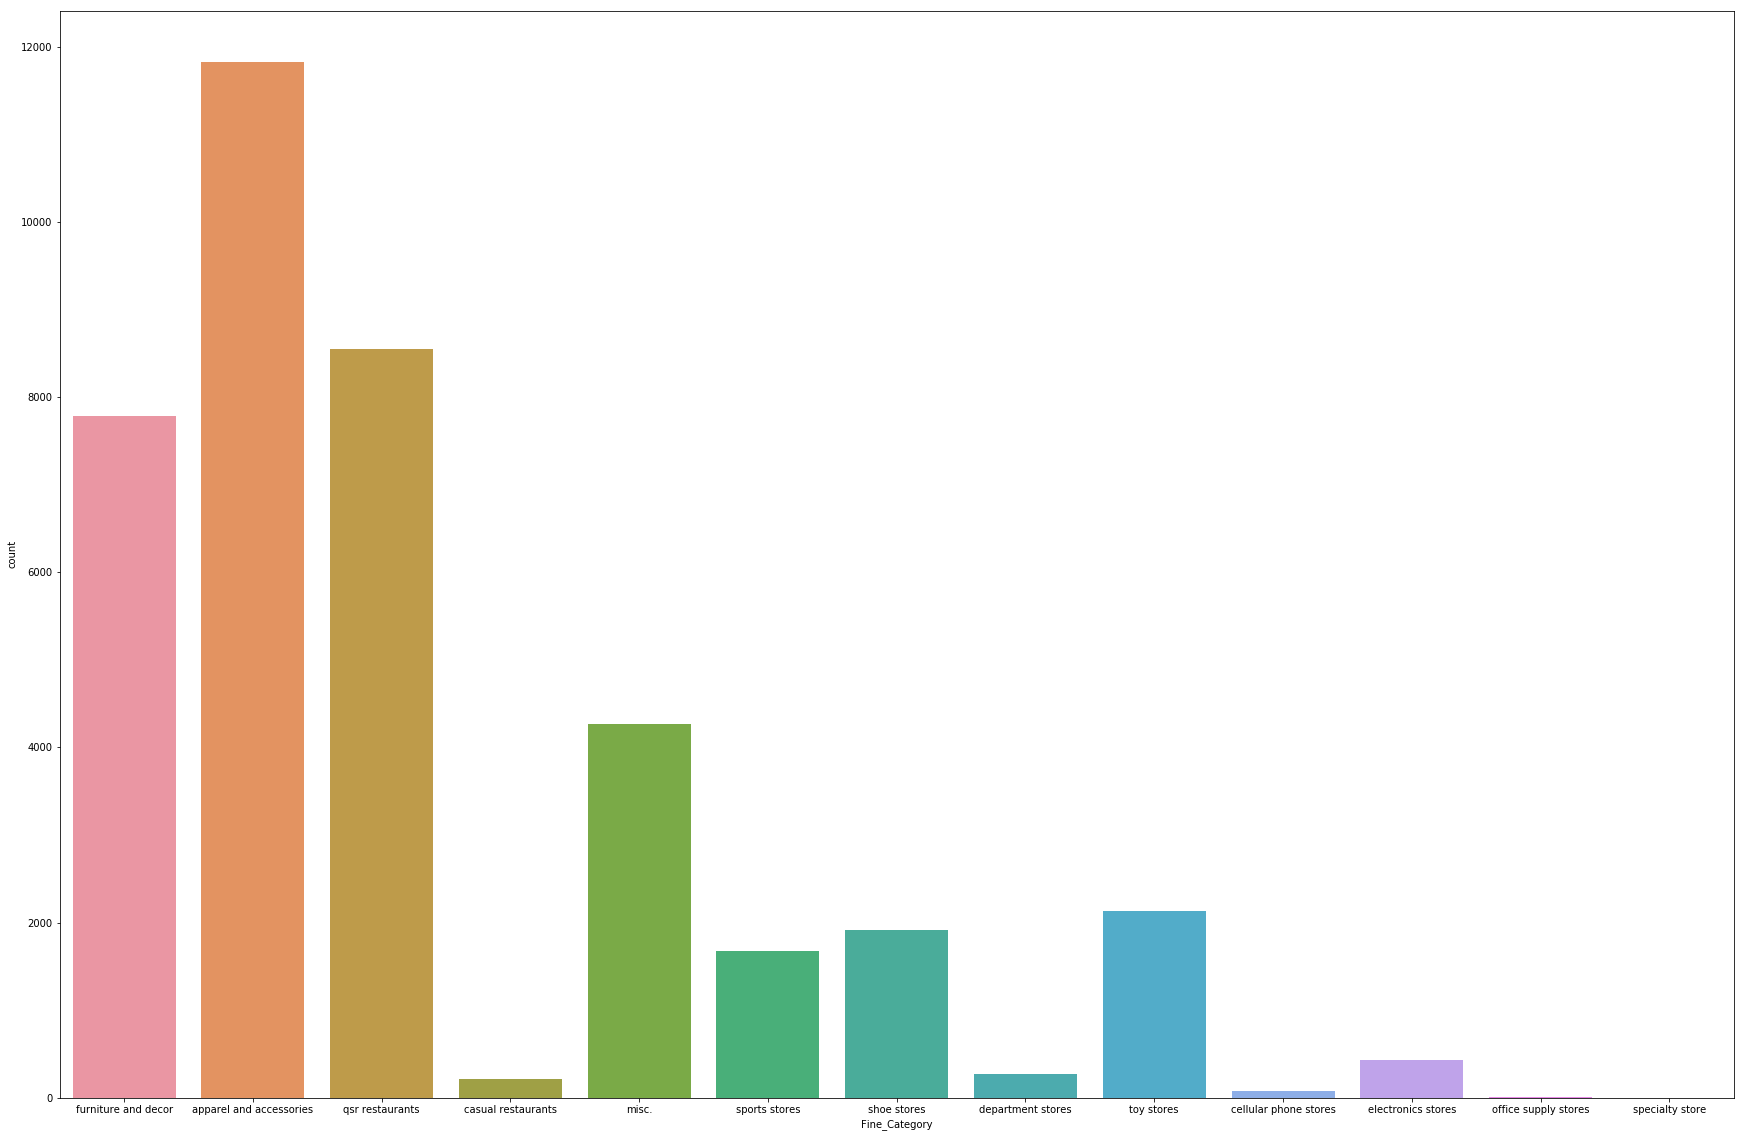

In [87]:
rcParams['figure.figsize']=30,20# (width ,height)
sns.countplot('Fine_Category',data=df)
plt.savefig("fav_cat_demo.png")

In [102]:
unique2, counts2 = np.unique(df.Fine_Category, return_counts=True)
df_fineCategory=pd.DataFrame(np.asarray((unique2, counts2)).T, columns=['Store_Name','count'])
df_fineCategory.sort_values(['count'],ascending=0,inplace=True)

In [103]:
df_fineCategory.head()

,Store_Name,count
0,apparel and accessories,11818
8,qsr restaurants,8546
5,furniture and decor,7786
6,misc.,4265
12,toy stores,2132


In [104]:
writer=pd.ExcelWriter('df_Fine_Retailer.xlsx')
df_fineCategory[['Store_Name','count']].to_excel(writer,'Sheet1',index=False)
writer.save()

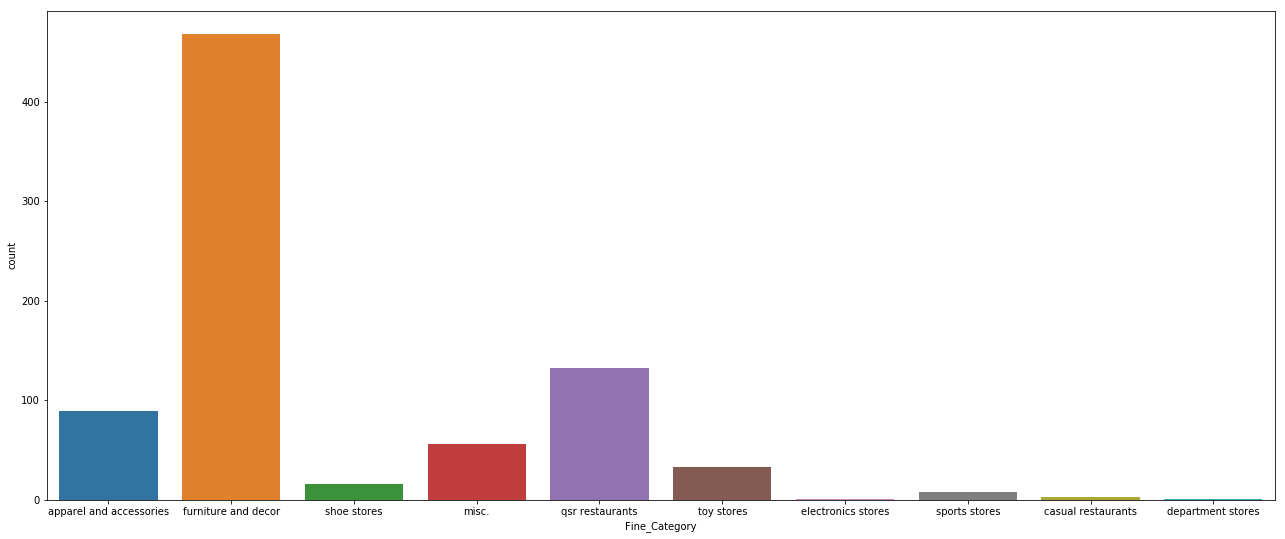

In [88]:
rcParams['figure.figsize']=22,9
sns.countplot('Fine_Category',data=demo)
plt.savefig("fav_fine_cat_demo.png")

In [95]:
demo.head()

,Shopper_Id,ID,Age,Gender,Marital_Status,Owns_Home,Number_of_Children_under_18_years_of_age,Store_Name,Floor_name_x,Floor_Index_x,...,longitude_x,Broad_Category_x,Fine_Category_x,Floor_name_y,Floor_Index_y,latitude_y,longitude_y,Broad_Category_y,Fine_Category_y,Fine_Category
0,Shopper_1,1,23,F,D,N,1,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories
1,Shopper_27,27,62,M,S,Y,0,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories
2,Shopper_33,33,63,M,M,Y,0,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories
3,Shopper_69,69,36,F,D,N,2,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories
4,Shopper_97,97,24,F,D,Y,1,Fossil,Level 3,3,...,-122.407111,Retail,Apparel And Accessories,Level 3,3,37.784191,-122.407111,Retail,Apparel And Accessories,apparel and accessories


# coountplot of ppl visiting differnt Store_category

[['Aldo' 7]
 ['Amoura Cafe Fresh Mediterranean' 5]
 ['Aritzia' 1]
 ['Bespoke Events' 5]
 ['Bristol Farms' 3]
 ['Brookstone' 1]
 ['Cafe Bellini' 25]
 ['Champs Sports' 7]
 ['Corner W' 7]
 ['Currency Exchange International ' 13]
 ['DAVIDsTEA' 1]
 ['Dyson' 11]
 ['Forever Flawless ' 105]
 ['Fossil' 35]
 ['GNC' 41]
 ['Haagen Dazs' 21]
 ['Janie And Jack' 8]
 ['Karen Millen' 4]
 ['Kate Spade New York' 10]
 ["Kiehl's" 320]
 ['LEGO' 25]
 ['Lady Foot Locker' 1]
 ['Loving Hut Vegan Cuisine ' 5]
 ['M.Y. China' 10]
 ['Marbles: The Brain Store' 8]
 ['Nordstrom E-Bar' 2]
 ['OAK+FORT' 9]
 ['Optica' 2]
 ['Pandora' 3]
 ['ProActiv Solutions ' 1]
 ['Samsonite' 15]
 ['Shoe Wiz' 23]
 ['Superdry ' 2]
 ['TAP 415' 62]
 ['The Walking Company' 2]
 ["Victoria's Secret" 5]
 ["Wetzel's Pretzels" 1]
 ['iPlay n Talk' 1]]


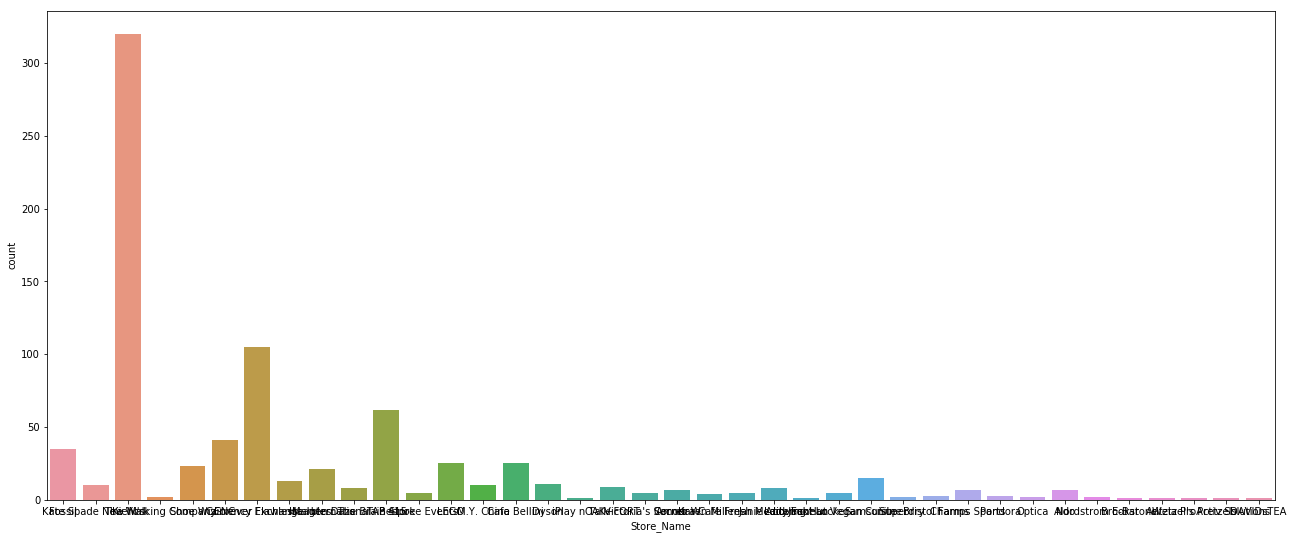

In [90]:
unique2, counts2 = np.unique(demo.Store_Name, return_counts=True)
print (str(np.asarray((unique2, counts2)).T))


rcParams['figure.figsize']=22,9
sns.countplot('Store_Name',data=demo)

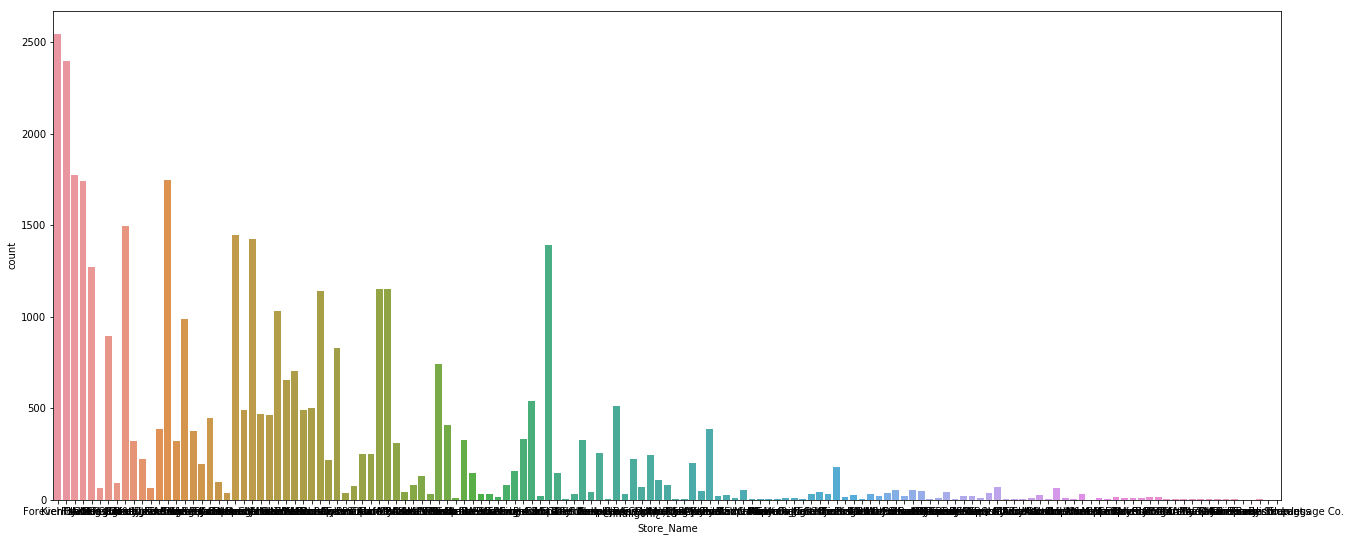

In [91]:
unique2, counts2 = np.unique(df.Store_Name, return_counts=True)
freq_stores_visited=pd.DataFrame(np.asarray((unique2, counts2)).T, columns=['Store_Name','count'])
freq_stores_visited.sort_values(['count'],ascending=0,inplace=True)


rcParams['figure.figsize']=22,9
sns.countplot('Store_Name',data=df)

In [96]:
#freq_stores_visited.sort_values(['count'],ascending=0,inplace=True)
freq_stores_visited.head(7)

,Store_Name,count
68,Kiehl's,2546
48,Forever Flawless,2399
49,Fossil,1775
124,TAP 415,1749
51,GNC,1745
57,Haagen Dazs,1494
63,Janie And Jack,1445


In [99]:
writer=pd.ExcelWriter('df_fav_shops.xlsx')
freq_stores_visited[['Store_Name','count']].to_excel(writer,'Sheet1',index=False)
writer.save()

In [ ]:
freq_stores_visited=pd.merge(freq_stores_visited,cat)

# Each shopper and its fav category using DEMOGRaph

In [ ]:
df=pd.merge(df,demo,on='ID')

In [ ]:
df.head()

In [ ]:
sns.distplot(df['Age'],bins=[0,10,20,30,40,50,60,70,80,90,95],kde=False,axlabel=None)


In [ ]:
cat.head()
#cat.rename(columns={'Store_Name':'top_shop'},inplace=True)

In [ ]:
demo_copy=pd.merge(demo,cat,on='Store_Name')

In [ ]:
demo.sort_values(['ID'],ascending=True)

In [ ]:
#FINAL SOLUTION
writer=pd.ExcelWriter('submit_res4.xlsx')
demo[['Shopper_Id','top_shop','Fine_Category','ID']].to_excel(writer,'Sheet1',index=True)
writer.save()

#  BELOW THIS USELESS

NameError: name 'fig' is not defined

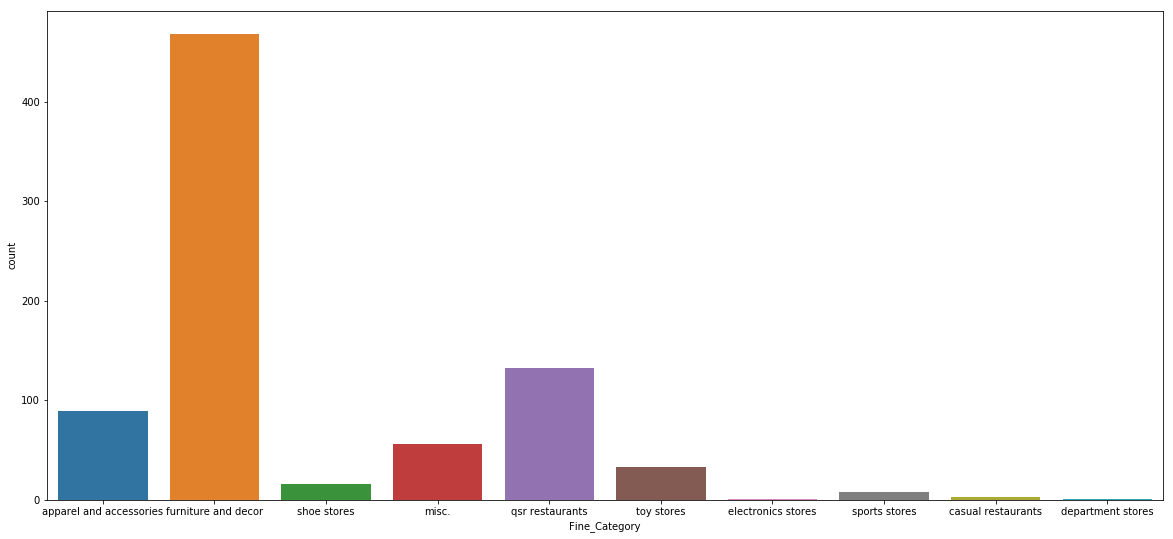

In [93]:
#fig,axes=plt.subplots(1,2)
rcParams['figure.figsize']=20,9
sns.countplot('Fine_Category',data=demo)
#sns.countplot('Fine_Category',data=demo,ax=axes[1])
fig.show()

# Fav Categories

In [ ]:
fig,axes=plt.subplots(1,2)

rcParams['figure.figsize']=17.87,7.97  # 1st parameter width second parameter height
sns.countplot('Broad_Category',data=demo,ax=axes[0])
sns.countplot('Broad_Category',data=df,ax=axes[1])

In [ ]:
data.head(25)

In [ ]:
data['seenTimestamp']= pd.to_datetime(data['seenTimestamp'])

In [ ]:
data['hour']=data['seenTimestamp'].apply( lambda x: x.hour)
data['month']=data['seenTimestamp'].apply( lambda x: x.month)
data.head()

In [ ]:
rcParams['figure.figsize']=20,11.2
sns.countplot('hour',data=df)

In [ ]:
#fig,axes=plt.subplots(2,1)
rcParams['figure.figsize']=12,8.97
#sns.countplot('Fine_Category',data=demo,ax=axes[0])
sns.countplot('Fine_Category_x',data=df)
#fig.show()

In [ ]:
rcParams['figure.figsize']=7,7
sns.countplot('hour',data=temp)

# LOAD DATA

In [ ]:
knn=pd.read_excel("prob_model_KNN.xlsx")
lgb=data=pd.read_excel("prob_model_LGMB.xlsx")
forest=data=pd.read_excel("prob_model_FOREST.xlsx")

print(knn.head())
print(lgb.head())

predknn_lgb=knn['Store_Name']-lgb['Store_Name']
predknn_lgb=list(predknn_lgb)
predknn_lgb.count(0)

predknn_for=knn['Store_Name']-forest['Store_Name']
predknn_for=list(predknn_for)
predknn_for.count(0)

predfor_lgb=forest['Store_Name']-lgb['Store_Name']
predfor_lgb=list(predfor_lgb)
predfor_lgb.count(0)